In [1]:
install.packages("gganimate")
install.packages("sn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library("ggplot2")
library("gganimate")
library("sn")

Loading required package: stats4


Attaching package: ‘sn’


The following object is masked from ‘package:stats’:

    sd




In [3]:
#defining the parameters for the skewnormal distribution
mu = 0
sigma = 4
alpha0 = 0
alpha1 = 1
alpha2 = 2
alpha3 = 3
alpha4 = 4
alpha5 = 5

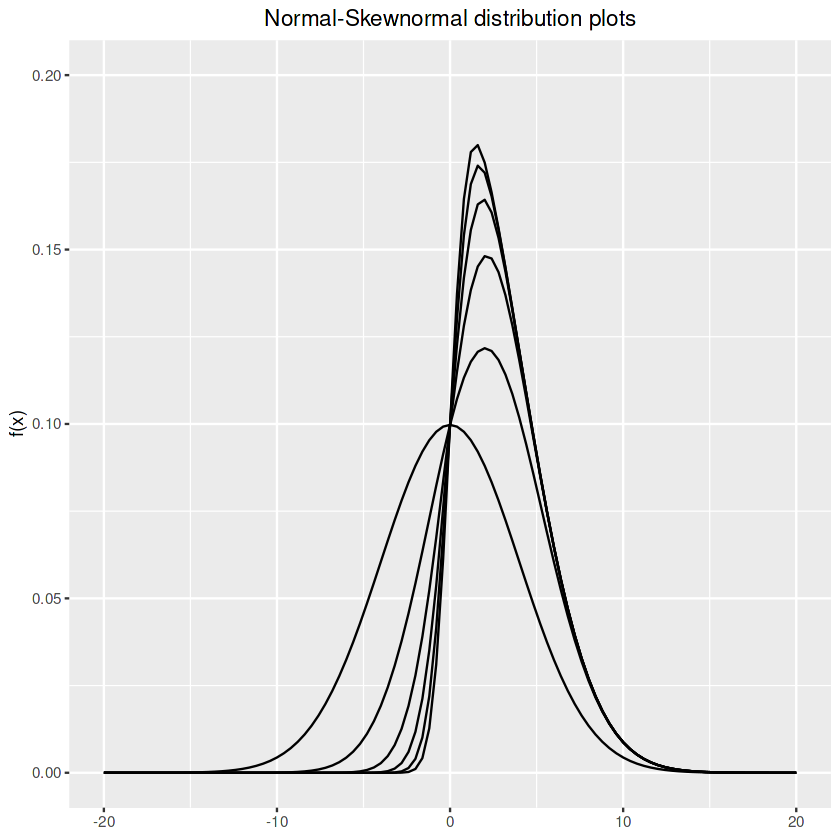

In [4]:
base <- ggplot() + xlim(-20, 20) + ylim(0,0.2)
base + geom_function(fun = dsn, args = list(xi=mu, omega=sigma, alpha=alpha0)) + 
    geom_function(fun = dsn, args = list(xi=mu, omega=sigma, alpha=alpha1)) +
    geom_function(fun = dsn, args = list(xi=mu, omega=sigma, alpha=alpha2)) +
    geom_function(fun = dsn, args = list(xi=mu, omega=sigma, alpha=alpha3)) +
    geom_function(fun = dsn, args = list(xi=mu, omega=sigma, alpha=alpha4)) +
    geom_function(fun = dsn, args = list(xi=mu, omega=sigma, alpha=alpha5)) +
    labs(title = "Normal-Skewnormal distribution plots",y = "f(x)") +
    theme(plot.title = element_text(hjust = 0.5))
    # theme_classic()

In [5]:
x = seq(-20,20,length = 10000)

In [6]:
y0 = dsn(x,mu,sigma,alpha0)
y1 = dsn(x,mu,sigma,alpha1)
y2 = dsn(x,mu,sigma,alpha2)
y3 = dsn(x,mu,sigma,alpha3)
y4 = dsn(x,mu,sigma,alpha4)
y5 = dsn(x,mu,sigma,alpha5)

In [7]:
y_data = c(y0,y1,y2,y3,y4,y5)
alpha = c(alpha0,alpha1,alpha2,alpha3,alpha4,alpha5)
alpha_data = rep(c(alpha0,alpha1,alpha2,alpha3,alpha4,alpha5),each = length(x))
x_data = rep(x,length(alpha))

In [8]:
df_plot = data.frame(x_data,y_data,alpha_data)

In [9]:
df_plot1= data.frame(x,y0)

In [10]:
graph = ggplot(df_plot) + 
    geom_point(aes(x = x_data,y = y_data),color = "#00AAFF") +
    labs(title = "Skewnormal Distribution",x = "x",y = "f(x)") +
    theme(plot.title = element_text(hjust = 0.5))

In [11]:
graph.animation = graph +
    transition_time(alpha_data) +
    labs(subtitle = "delta: {frame_time}") +
    shadow_wake(wake_length = 0.1)

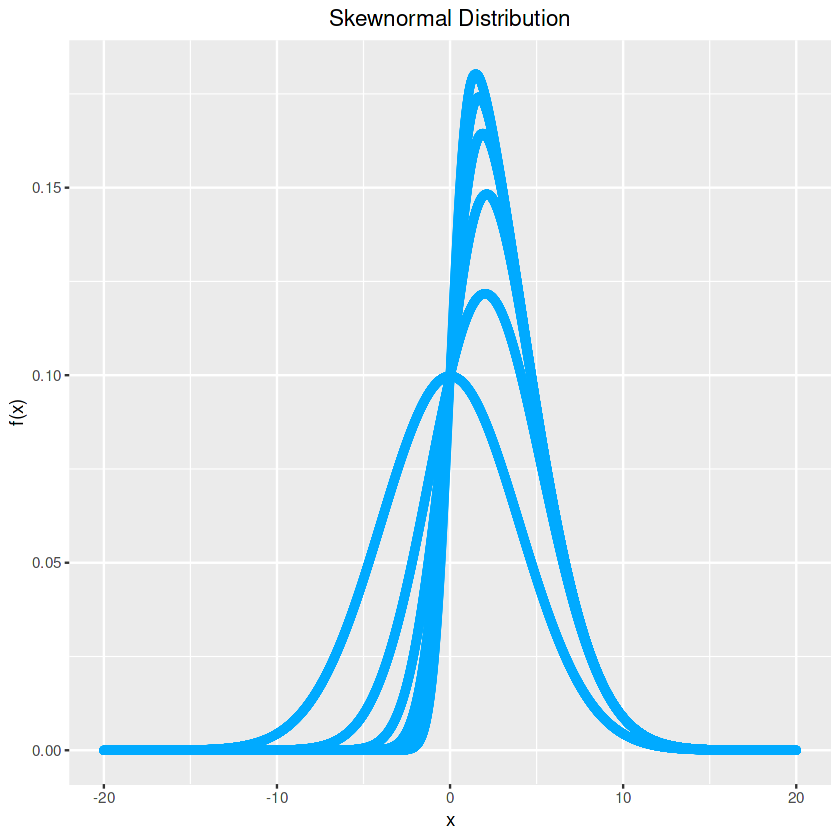

In [12]:
print(graph)

In [13]:
animate(graph.animation, height = 500, width = 800, fps = 30, duration = 10,
        end_pause = 60, res = 100)
anim_save("gapminder graph.gif")